<a href="https://colab.research.google.com/github/soumyb09/soumyb09/blob/master/Bokeh_A19034.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget "https://raw.githubusercontent.com/WillKoehrsen/Bokeh-Python-Visualization/master/intro/data/flights.csv"

--2020-02-11 17:44:56--  https://raw.githubusercontent.com/WillKoehrsen/Bokeh-Python-Visualization/master/intro/data/flights.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36326178 (35M) [text/plain]
Saving to: ‘flights.csv.1’

flights.csv.1       100%[===================>]  34.64M  50.6MB/s    in 0.7s    

2020-02-11 17:44:57 (50.6 MB/s) - ‘flights.csv.1’ saved [36326178/36326178]



In [0]:
import pandas as pd
import numpy as np

In [0]:
from bokeh.plotting import figure

from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import Category10_5, Category20_16

In [0]:
flights = pd.read_csv('/content/flights.csv', index_col=0)


In [0]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [0]:
import os
import sys


In [0]:
flights['arr_delay'].describe()

count    327346.000000
mean          6.895377
std          44.633292
min         -86.000000
25%         -17.000000
50%          -5.000000
75%          14.000000
max        1272.000000
Name: arr_delay, dtype: float64

In [0]:
arr_hist, edges = np.histogram(flights['arr_delay'], bins = int(240/5), range = [-120, 120])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [0]:
# Set up the figure
p = figure(plot_width = 500, plot_height = 500, title = 'Histogram of Arrival Delays',
          x_axis_label = 'Minutes', y_axis_label = 'Count')

# Add a quad glyph
p.quad(bottom=0, top=arr_hist, left=edges[:-1], right=edges[1:], fill_color='red', line_color='black')

# To show in notebook
output_notebook()

# Show the plot
show(p)

In [0]:
def style(p):
    p.title.align = 'center'
    p.title.text_font_size = '18pt'
    p.xaxis.axis_label_text_font_size = '12pt'
    p.xaxis.major_label_text_font_size = '12pt'
    p.yaxis.axis_label_text_font_size = '12pt'
    p.yaxis.major_label_text_font_size = '12pt'
    
    return p

In [0]:
styled_p = style(p)

show(styled_p)

In [0]:
arr_df = pd.DataFrame({'count': arr_hist, 'left': edges[:-1], 'right': edges[1:]})
arr_df['f_count'] = ['%d flights' % count for count in arr_df['count']]
arr_df['f_interval'] = ['%d to %d minutes' % (left, right) for left, right in zip(arr_df['left'], arr_df['right'])]

arr_df.head()

,count,left,right,f_count,f_interval
0,0,-120.0,-115.0,0 flights,-120 to -115 minutes
1,0,-115.0,-110.0,0 flights,-115 to -110 minutes
2,0,-110.0,-105.0,0 flights,-110 to -105 minutes
3,0,-105.0,-100.0,0 flights,-105 to -100 minutes
4,0,-100.0,-95.0,0 flights,-100 to -95 minutes


In [0]:
arr_src = ColumnDataSource(arr_df)

In [0]:
arr_src.data.keys()

dict_keys(['index', 'count', 'left', 'right', 'f_count', 'f_interval'])

In [0]:
# Set up the figure same as before
p = figure(plot_width = 500, plot_height = 500, title = 'Histogram of Arrival Delays',
          x_axis_label = 'Minutes', y_axis_label = 'Count')

# Add a quad glyph with source this time
p.quad(bottom=0, top='count', left='left', right='right', source=arr_src,
       fill_color='red', line_color='black')

# Add style to the plot
styled_p = style(p)

# Add a hover tool referring to the formatted columns
hover = HoverTool(tooltips = [('Delay', '@f_interval'),
                              ('Count', '@f_count')])

# Add the hover tool to the graph
styled_p.add_tools(hover)

# Show the plot
show(styled_p)

In [0]:
# Group by the carrier to find the most common
carrier_nums = flights.groupby('carrier')['year'].count().sort_values(ascending=False)

In [0]:
carrier_nums

carrier
UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: year, dtype: int64

In [0]:
# Subset to the 8 most common carriers
flights = flights[flights['carrier'].isin(carrier_nums.index[:5])]

# Subset to only [-2, +2] hour delays
flights = flights[(flights['arr_delay'] >= -120) & (flights['arr_delay'] <= 120)]

In [0]:
!wget 'https://raw.githubusercontent.com/WillKoehrsen/Bokeh-Python-Visualization/master/intro/data/airlines.csv'

--2020-02-11 17:45:01--  https://raw.githubusercontent.com/WillKoehrsen/Bokeh-Python-Visualization/master/intro/data/airlines.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386 [text/plain]
Saving to: ‘airlines.csv.1’

airlines.csv.1      100%[===================>]     386  --.-KB/s    in 0s      

2020-02-11 17:45:01 (81.8 MB/s) - ‘airlines.csv.1’ saved [386/386]



In [0]:
carrier_names = pd.read_csv('/content/airlines.csv')

In [0]:
carrier_names.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [0]:
flights = flights.merge(carrier_names, how = 'left', on = 'carrier')
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [0]:
by_carrier = pd.DataFrame(columns=['proportion', 'left', 'right', 
                                   'f_proportion', 'f_interval',
                                   'name', 'color'])

# Iterate through all the carriers
for i, carrier_name in enumerate(flights['name'].unique()):
    
    # Subset to the carrier
    subset = flights[flights['name'] == carrier_name]
    
    # Create a histogram with 5 minute bins
    arr_hist, edges = np.histogram(subset['arr_delay'], bins = int(240/5), range = [-120, 120])
    
    # Divide the counts by the total to get a proportion
    arr_df = pd.DataFrame({'proportion': arr_hist / np.sum(arr_hist), 'left': edges[:-1], 'right': edges[1:] })
    
    # Format the proportion 
    arr_df['f_proportion'] = ['%0.5f' % proportion for proportion in arr_df['proportion']]
    
    # Format the interval
    arr_df['f_interval'] = ['%d to %d minutes' % (left, right) for left, right in zip(arr_df['left'], arr_df['right'])]
    
    # Assign the carrier for labels
    arr_df['name'] = carrier_name
    
    # Color each carrier differently
    arr_df['color'] = Category10_5[i]

    # Add to the overall dataframe
    by_carrier = by_carrier.append(arr_df)
    
# Overall dataframe
by_carrier = by_carrier.sort_values(['name', 'left'])

In [0]:
by_carrier.head()

,proportion,left,right,f_proportion,f_interval,name,color
0,0.0,-120.0,-115.0,0.00000,-120 to -115 minutes,American Airlines Inc.,#ff7f0e
1,0.0,-115.0,-110.0,0.00000,-115 to -110 minutes,American Airlines Inc.,#ff7f0e
2,0.0,-110.0,-105.0,0.00000,-110 to -105 minutes,American Airlines Inc.,#ff7f0e
3,0.0,-105.0,-100.0,0.00000,-105 to -100 minutes,American Airlines Inc.,#ff7f0e
4,0.0,-100.0,-95.0,0.00000,-100 to -95 minutes,American Airlines Inc.,#ff7f0e


In [0]:
by_carrier_src = ColumnDataSource(by_carrier)

In [0]:
# Create the figure
p = figure(plot_height = 600, plot_width = 800, title = 'Histogram of Airline Delays by Carrier',
          x_axis_label = 'Arrival Delay (min)', y_axis_label = 'Proportion')

# Add the quad glpyh with the source by carrier
p.quad(bottom = 0, left = 'left', right = 'right', top = 'proportion',
       fill_color = 'color',  legend = 'name', source = by_carrier_src,
      fill_alpha = 0.6, hover_fill_alpha = 1.0, hover_fill_color = 'color')

# Create the hover tool
hover = HoverTool(tooltips = [('Carrier', '@name'),
                              ('Proportion', '@f_proportion'),
                              ('Delay', '@f_interval')],
                 mode = 'vline')

# Add styling and hover tool
styled_p = style(p)
styled_p.add_tools(hover)
output_notebook()
show(styled_p)

Simpler Approach With Seaborn

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

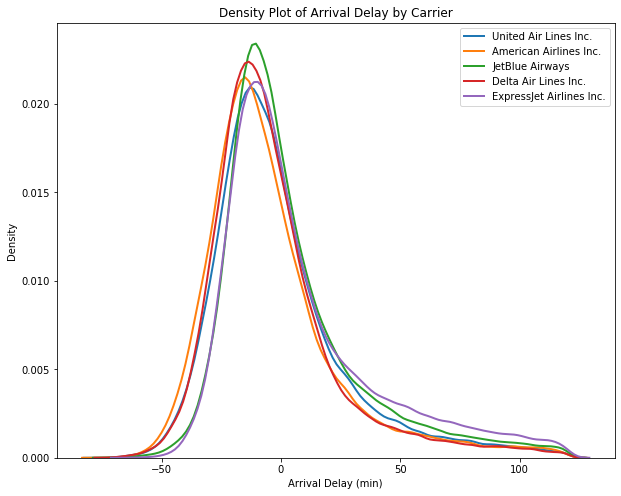

In [0]:
# Create a figure
plt.figure(figsize=(10, 8))

# Iterate through each carrier and make a density plot (kde)
for i, carrier in enumerate(flights['name'].unique()):
    subset = flights[flights['name'] == carrier]
    sns.kdeplot(subset['arr_delay'], color = Category10_5[i], label = '%s' % carrier, lw = 2 );

plt.xlabel('Arrival Delay (min)')
plt.ylabel('Density')
plt.title('Density Plot of Arrival Delay by Carrier')
plt.legend();